In [1]:
import pandas as pd
import numpy as np
import asyncio
import re
import os
from datetime import datetime, timedelta
import betwatch
from betwatch.types import (
    Bookmaker,
    MarketPriceType,
    MeetingType,
    RaceProjection,
    RacesFilter,
)
import matplotlib.pyplot as plt

TODO
- flucs
- place markets

In [2]:
def extract_track_and_date(input_string):
    # Define a regular expression pattern
    pattern = re.compile(r'\((.*?)\) (.*?) R(\d+) \[(\d{2}/\d{2}/\d{4} \d{2}:\d{2})\]')

    # Match the pattern in the input string
    match = pattern.match(input_string)

    if match:
        # Extract matched groups
        track_type, track_name, race_number, date_string = match.groups()

        # Parse the date string to a datetime object
        race_date = datetime.strptime(date_string, "%d/%m/%Y %H:%M").strftime(format='%Y-%m-%d')

        return {
            'track_type': track_type,
            'track_name': track_name,
            'race_number': int(race_number),
            'race_date': race_date
        }
    else:
        return None


In [3]:

api_key = 'd747b241-f64c-4b2b-8573-f0557cc31e03'

client = betwatch.connect(api_key=api_key)

# define the projection of the returned data
# we can filter out for certain bookmakers as well as define whether we want market data or flucs
projection = RaceProjection(
    markets=True,  bookmakers=[Bookmaker.SPORTSBET], flucs=True
)

# define the filter for the query
# here we can filter by date, type of meeting, and various other parameters
races_filter = RacesFilter(
    date_from=datetime.now() - timedelta(days=600),
    date_to=datetime.now() - timedelta(days=1),
    types=[MeetingType.GREYHOUND],  # filter on a race type

)

races = client.get_races(projection, races_filter)

In [11]:
res=[]
empties=0
for race in races:
    rname = str(race)
    res1 = extract_track_and_date(rname)
    if(1==1):
    # make sure the race has runners
        if race.runners:
            # loop through each runner in the race
            for runner in race.runners:
                name = str(runner)
                
                price=0
                date='1900-01-01'
                fluc=0
                diff=0
                
                for m in runner.bookmaker_markets:
                    try:
                        price = m.fixed_win.price
                        date = m.fixed_win._last_updated
                        
                        fluc =m.fixed_win.flucs[0].price
                        fluc_time = m.fixed_win.flucs[0]._last_updated
                        
                        
                        timestamp1 = datetime.fromisoformat(date[:-1])  # Remove 'Z' at the end
                        timestamp2 = datetime.fromisoformat(fluc_time[:-1])
                        diff = timestamp1 - timestamp2
                        diff = int(diff.total_seconds() / 60)
                        
                        
                    except:
                        empties+=1
#                         print(empties)

                res2 = res1.copy()
                res2['name']=name
                res2['price']=price
                res2['fluc']=fluc
                res2['time_diff']=diff
                res.append(res2)
                
df = pd.DataFrame(res)
print('errors:',empties)
df

errors: 109301


,track_type,track_name,race_number,race_date,name,price,fluc,time_diff
0,G,Ascot Park,1,2022-11-07,1. Extra Gold,5.0,5.0,147
1,G,Ascot Park,1,2022-11-07,2. Homebush Classy,7.5,5.0,147
2,G,Ascot Park,1,2022-11-07,3. Homebush Geoff,3.0,4.6,148
3,G,Ascot Park,1,2022-11-07,4. Jokes On Us,9.0,12.0,147
4,G,Ascot Park,1,2022-11-07,5. Homebush Axel,11.0,7.5,148
...,...,...,...,...,...,...,...,...
655275,G,Swindon,12,2024-02-25,2. Datsthewaytodoit,0.0,0.0,0
655276,G,Swindon,12,2024-02-25,3. Ashway Amber,0.0,0.0,0
655277,G,Swindon,12,2024-02-25,4. Ellie Eithne,0.0,0.0,0
655278,G,Swindon,12,2024-02-25,5. Charlies Eske,0.0,0.0,0


In [14]:
df.to_csv('betwatch_prices1.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc5d2e86c20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc5d2e87160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc5d2e86980>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc5d2e876a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc5d2e87940>],
 'means': []}

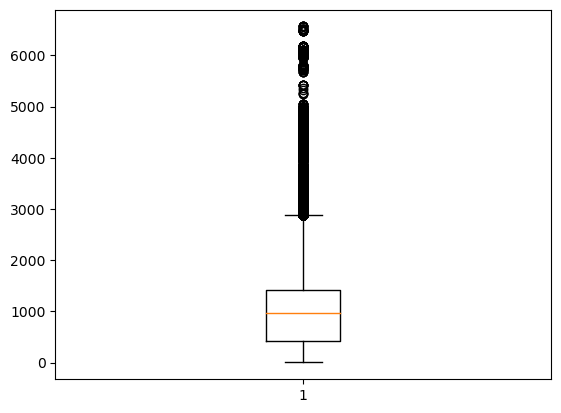

In [12]:
plt.boxplot(df[df['time_diff']>0]['time_diff'])

In [13]:
runner.bookmaker_markets[0].fixed_win.flucs[0]._last_updated

IndexError: list index out of range

In [ ]:
df2 = df.copy()
df2 = df2.drop(columns=['track_type','race_number'])
df2 = df2.rename(columns={'name':'DogName','race_date':'date','price':'sb','track_name':'Track'})
df2['DogName']=np.where(df2['DogName'].str.contains('10.'),df2['DogName'].str[4:],df2['DogName'].str[3:])
df2['DogName']= df2['DogName'].str.lower().str.strip()
df2['date']=df2['date'].astype(str)
trks = ['shepparton', 'maitland', 'ballarat', 'sandown park', 'goulburn', 'hobart', 'dapto', 'angle park', 'warrnambool', 'warragul', 'albion park', 'northam', 'traralgon', 'healesville', 'richmond', 'ipswich', 'geelong', 'casino', 'the gardens', 'cannington', 'mount gambier', 'dubbo', 'bendigo', 'bulli', 'horsham', 'wentworth park', 'the meadows', 'sale', 'darwin', 'gawler', 'grafton', 'nowra', 'bathurst', 'launceston', 'townsville', 'devonport', 'lismore', 'rockhampton', 'cranbourne', 'strathalbyn', 'wagga', 'cairns', 'mandurah', 'temora', 'gosford', 'capalaba', 'murray bridge', 'angle park', 'ipswich', 'bundaberg', 'gunnedah', 'taree']
df2 = df2[df2['Track'].str.lower().isin(trks)]
df2['Track']=df2['Track'].str.lower()
df2

In [ ]:
allraces = pd.read_csv('bsp_allRaces.csv')
allraces['date']=allraces['date'].astype(str)
allraces

In [ ]:
df3 = pd.merge(df2,allraces,how='inner',on=['DogName','date','Track'])
df4=df3[['DogName','Track','date','sb','StartPrice','BSP','fluc','time_diff']]
df4.to_csv('price_comparison.csv')
df4

In [ ]:
df4['StartPrice']=df4['StartPrice'].astype(float,errors='ignore')
df4['sb']=df4['sb'].astype(float,errors='ignore')
df4['sb-sp']=df4['sb']-df4['StartPrice']
for track in df4['Track'].unique():
    print(track)
    values = np.arange(1,10,0.5)
    
    for val in values:
        df5=df4[ (df4['sb'] >= val) & (df4['sb'] <= val+0.5) & (df4['Track']==track)]
        df5=df5.dropna(subset=['sb-sp'])
        print(val,'-',val+0.5,'mean:',df5['sb-sp'].mean(),'std:',df5['sb-sp'].std())
    print()
    print()